In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_excel('archive.xlsx', sheet_name='til', header=0)

In [3]:
df = df.drop(["Unnamed: 0",'일일 공부/계발 시간', 'Unnamed: 8', 'Unnamed: 9', '공부분야'],axis=1)

In [4]:
df.head(2)

,날짜,분류,제목,내용/배운것,칭찬/반성,시간
0,2019-12-26,🦎 파이썬,이터러블 개념 다시 복습하기,본문에 따로 메모,"수업 수강 중에 나타난, 대충 알기만 한다는 것들은 따로 체크한 뒤 싹다 백업하는 ...",0.16
1,2019-12-26,📈 데이터처리,DS school 과제 (하),피벗테이블 오랜만에 연습. \n람다 함수 apply 할 때 칼럼 쓰는지 안 쓰는지....,첫술에 배부르면 안 된다. 아직 공부 시작한지 2달밖에 안 됨! 잊지말자!\n하지만...,3.00


In [5]:
df = df.iloc[:201,:]

In [6]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [7]:
df_cate = df.drop(['제목', '내용/배운것', '칭찬/반성'], axis=1)

In [8]:
df_cate['요일'] = df_cate['날짜'].dt.weekday_name

In [9]:
df_cate.pivot_table(index='분류', values='시간', aggfunc='mean')

,시간
분류,
⌨️ 기타 프로그래밍,3.750000
🇺🇸 영어,0.800000
🏋️ 운동,0.842941
📈 데이터처리,3.338710
📐 수학,2.166667
"📕 독서(책, 아티클)",0.657222
🛢 SQL,2.944444
🤖 머신러닝,2.571429
🦀 통계,2.611111


In [10]:
df_cate.pivot_table(index='분류', values='시간', aggfunc='sum')

,시간
분류,
⌨️ 기타 프로그래밍,15.00
🇺🇸 영어,12.00
🏋️ 운동,42.99
📈 데이터처리,103.50
📐 수학,19.50
"📕 독서(책, 아티클)",11.83
🛢 SQL,26.50
🤖 머신러닝,72.00
🦀 통계,70.50


In [26]:
df_cate_not_workingout = df_cate.loc[df_cate['분류'] != '🏋️ 운동']

In [13]:
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [15]:
df_cate_weekday = df_cate.pivot_table(index='요일', values='시간', aggfunc='sum')
df_cate_weekday = df_cate_weekday.loc[weekday_list]

In [20]:
df_cate_weekday.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='요일')

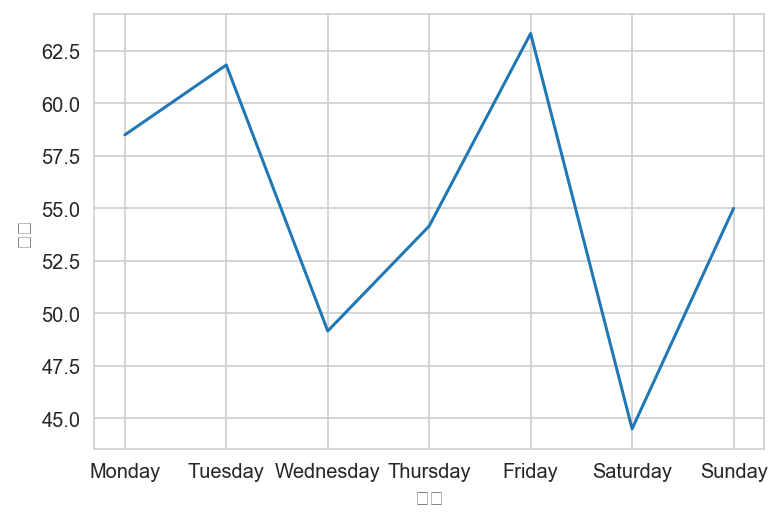

In [39]:
sns.lineplot(data=df_cate_weekday, x=df_cate_weekday.index, y='시간', sort=False)
#sort= False

In [27]:
df_cate_not_workingout_weekday = df_cate_not_workingout.pivot_table(index='요일', values='시간', aggfunc='sum')
df_cate_not_workingout_weekday = df_cate_not_workingout_weekday.loc[weekday_list]

In [34]:
df_cate_not_workingout_weekday_mean = df_cate_not_workingout.pivot_table(index='요일', values='시간', aggfunc='mean')
df_cate_not_workingout_weekday_mean = df_cate_not_workingout_weekday_mean.loc[weekday_list]

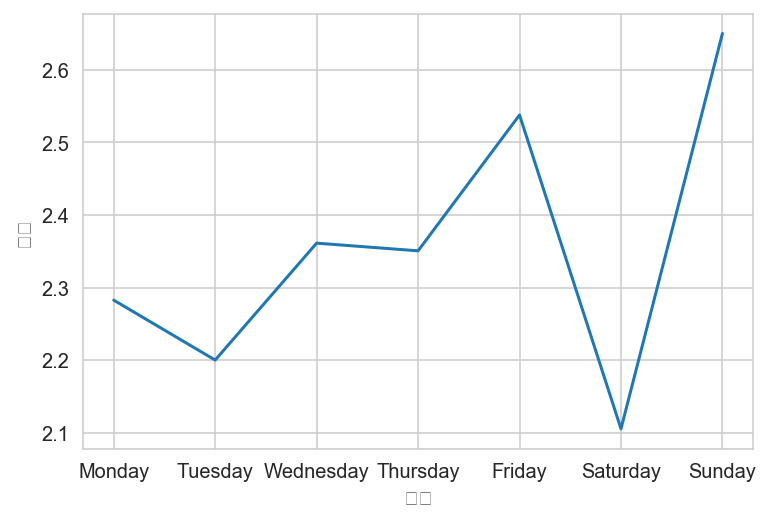

In [40]:
sns.lineplot(data=df_cate_not_workingout_weekday_mean, x=df_cate_not_workingout_weekday_mean.index, y='시간', sort=False)


#plt.plot(df_cate_not_workingout_weekday.index, df_cate_not_workingout_weekday['시간'], linestyle='--', linewidth=2) # 'dashed'

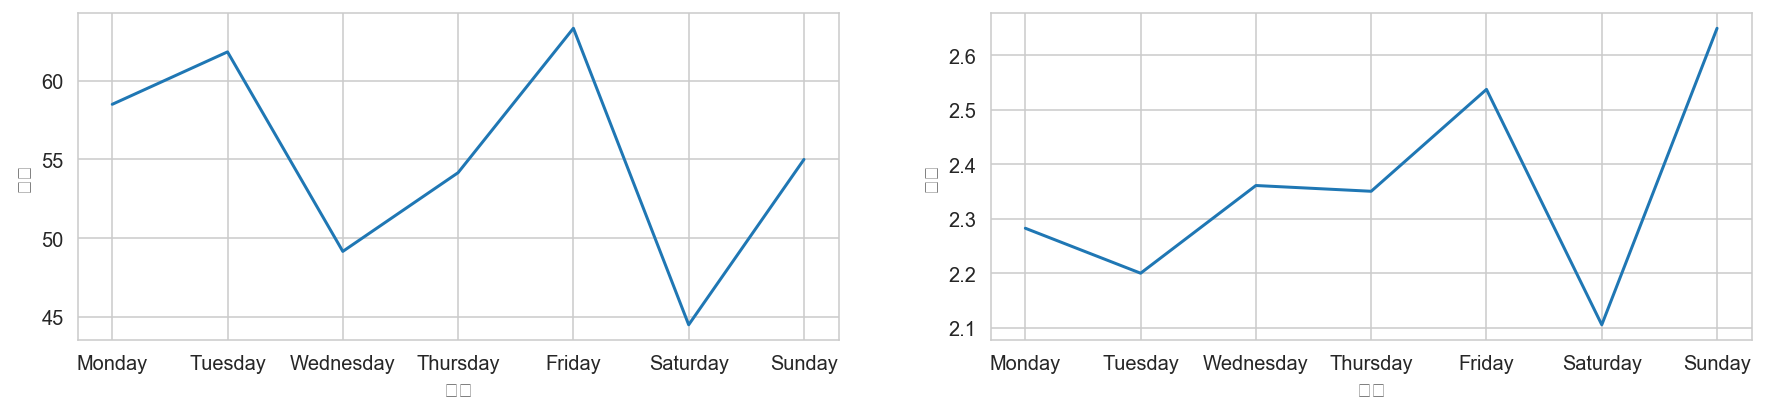

In [41]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,3)

sns.lineplot(data=df_cate_weekday, x=df_cate_weekday.index, y='시간', sort=False,
             ax=ax1)

sns.lineplot(data=df_cate_not_workingout_weekday_mean, x=df_cate_not_workingout_weekday_mean.index, y='시간', sort=False,
             ax = ax2)


In [33]:
df_cate_not_workingout.loc[df_cate_not_workingout['요일'] == 'Wednesday'].pivot_table(index='분류', values='시간', aggfunc='sum')

,시간
분류,
⌨️ 기타 프로그래밍,4.0
🇺🇸 영어,1.5
📈 데이터처리,8.0
📐 수학,2.0
"📕 독서(책, 아티클)",3.5
🛢 SQL,6.0
🤖 머신러닝,5.0
🦀 통계,6.5
🦎 파이썬,6.0
